In [87]:
using SparseArrays, Graphs, LinearAlgebra, Plots, GraphPlot, Colors;

In [88]:
#reading the txt file (blocks are separated by empty lines;
#the first line of each block is the author of the given tweet,
#the other lines are the hashtags)

hashtags = Vector{Vector{String}}()
users = Vector{Vector{String}}()
open("users_hashtags.txt") do f
    i = 0
    flag = 0
    for ln in eachline(f)
        if ln == ""
            push!(users, Vector{String}())
            push!(hashtags, Vector{String}())
            i+=1
            flag = 1
        elseif flag == 1
            push!(users[i], ln)
            flag = 0
        else
            push!(hashtags[i], ln)
        end
    end
end

In [89]:
users

301-element Vector{Vector{String}}:
 ["mk76e"]
 ["tontan1998"]
 ["trab_bot"]
 ["Onenjr2"]
 ["Alshaijihumoud"]
 ["njoyflyfishing"]
 ["borek_it"]
 ["pacoramon"]
 ["CoderNotesBot"]
 ["Laura83005609"]
 ["mochilein"]
 ["Praxis_Tweets"]
 ["Prometheus_Bot"]
 ⋮
 ["AnalyticsFr"]
 ["AnalyticsFr"]
 ["GoaiDev"]
 ["rahul05ranjan"]
 ["AnalyticsFr"]
 ["AnalyticsFr"]
 ["Bob_gamedev"]
 ["PDH_SciTechNews"]
 ["1000dayscodingb"]
 ["DataAugmented"]
 ["amishjt"]
 []

In [90]:
hashtags

301-element Vector{Vector{String}}:
 ["OTTalk", "OccupationalTherapy", "healthcare", "innovation", "science", "philosophy", "datascience", "bayes"]
 ["AI", "MachineLearning", "DeepLearning", "DataScience"]
 ["DataScience", "BigData", "AI"]
 []
 ["Bioinformatics", "OpenScience"]
 []
 []
 []
 ["BigData", "Analytics"]
 []
 ["Statistics", "dataviz"]
 ["datascience", "Bangalore"]
 ["Developers"]
 ⋮
 []
 []
 ["Coding"]
 ["Coding"]
 []
 []
 ["Infosec", "Infographic", "cybersecurity", "RStats", "AI", "Python", "DataScience"]
 ["Coding"]
 []
 ["Tableau", "DataScience", "DataVisualization", "DataAnalytics", "DataFam"]
 ["infographic", "AI", "BigData", "DataScience", "Automation"]
 []

In [91]:
all_users = vcat(users...)
unique_users = unique(all_users)

106-element Vector{String}:
 "mk76e"
 "tontan1998"
 "trab_bot"
 "Onenjr2"
 "Alshaijihumoud"
 "njoyflyfishing"
 "borek_it"
 "pacoramon"
 "CoderNotesBot"
 "Laura83005609"
 "mochilein"
 "Praxis_Tweets"
 "Prometheus_Bot"
 ⋮
 "slows99"
 "ShyBOT7"
 "megaluckz"
 "TechnoNBusiness"
 "mikeflache"
 "amishjt"
 "adfavelas"
 "PawanSomanchi"
 "_EllaBot"
 "AnalyticsFr"
 "1000dayscodingb"
 "DataAugmented"

In [92]:
all_hashtags = vcat(hashtags...)
unique_hashtags = unique(all_hashtags)

122-element Vector{String}:
 "OTTalk"
 "OccupationalTherapy"
 "healthcare"
 "innovation"
 "science"
 "philosophy"
 "datascience"
 "bayes"
 "AI"
 "MachineLearning"
 "DeepLearning"
 "DataScience"
 "BigData"
 ⋮
 "Crypto"
 "ETH"
 "TensorFlow"
 "Interviews"
 "KDnuggets"
 "softwareengineering"
 "Infosec"
 "cybersecurity"
 "Tableau"
 "DataVisualization"
 "DataFam"
 "Automation"

In [93]:
#building the adjacency matrix of the bipartite network
#(rule: user u and hashtag h are connected if user u tweeted about h at least once)

n_u = length(unique_users);
n_h = length(unique_hashtags);
n = n_u + n_h;
N = length(users); #equal to length(hashtags)
A = zeros(Int, n, n)

function edge(u_0, h_0)
    for i=1:N
        if users[i]==[u_0] && h_0 in hashtags[i]
            return 1
        end
    end
    return 0
end
    
    
for i in 1:n_u
    u = unique_users[i]
    for j in 1:n_h
        h = unique_hashtags[j]
        A[i,n_u+j] = edge(u, h)
    end
end    
A = sparse(max.(A, A'))

228×228 SparseMatrixCSC{Int64, Int64} with 1232 stored entries:
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⠉⢛⣂⣀⢀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠈⣷⡎⣑⣺⡂⢐⢒⠀⣀⡀⠀⡂⠐⠀⠀⠀⠀⠀⠐⠂
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣿⠃⠀⢸⡇⠘⢀⠀⡀⠀⠉⠣⠀⣀⣀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⡡⣿⠃⠒⢘⠏⠛⠯⣀⠅⠀⠀⡀⠄⠉⠁⠀⠀⠀⠁⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠘⣿⡄⠀⠢⡀⢀⢈⠻⡓⠲⣄⡀⠀⠀⢀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⣀⣙⡦⢁⣈⡂⢈⢀⣠⡀⠁⣁⣐⣂⣀⡀⠀⠁⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠅⠿⠆⠈⠙⠇⠰⠸⠉⠃⠈⠉⠖⠉⠷⢦⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠢⣾⡆⠀⠔⡆⢰⠐⠤⠀⠀⠀⡎⠅⠒⠚⠤⠄⠀⠒⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⢀⣽⠄⠁⢨⠂⠨⠄⢀⠀⡁⣁⠖⠂⠀⠠⣀⠱⠤⢄⠠
⡆⠀⡀⠀⠀⢠⠄⡠⣀⠀⠀⢠⠄⠄⠠⡀⠀⢀⠀⠀⠘⠁⠀⠀⠀⠀⠀⠀⠀⠂⠀⠀⠀⠀⠀⠀⠀⠀⠀⠒
⠻⢰⡹⠿⠿⠛⠿⠛⠛⠿⠳⡼⠻⠇⠺⠿⠓⠟⠖⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⢘⣱⣸⣀⣀⣘⢀⠠⡀⡁⢰⣆⠀⢀⠄⡁⣀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⢈⢈⣉⠉⣯⠁⠀⢈⡈⢈⢉⡁⢈⣉⡈⡀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠘⠐⠀⠐⠋⢣⣦⡐⠀⣰⡖⠂⠐⡄⠀⢁⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠸⠀⠈⠁⠁⢹⡈⠄⠈⡉⠀⠀⠀⠄⠠⠠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠠⠠⠧⡀⠀⠠⠀⠹⢁⢸⢣⠄⡠⠤⢡⠜⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠐⠀⠀⢠⡄⠁⠀⠀⠈⢸⢧⡄⢡⠁⠈⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠘⠁⠀⠀⠐⠀⠈⠈⠓⠚⡄⠀⢢⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠁⠀⠀⠀⠀⠁⠑⡆⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀
⠀⠀⠰⠀⠀⠀⠁⠀⠀⠀⠀⠀⠀⠀⠘⠀⠀⡑⢠⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀⠀

In [94]:
G = Graphs.Graph(A)

{228, 616} undirected simple Int64 graph

In [95]:
d = Graphs.degree(G)
not0 = findall(d .!= 0)

213-element Vector{Int64}:
   1
   2
   3
   5
   9
  11
  12
  13
  14
  15
  16
  18
  19
   ⋮
 217
 218
 219
 220
 221
 222
 223
 224
 225
 226
 227
 228

In [97]:
#eliminating isolated vertices from G
A = A[not0,not0]
d = d[not0]

n = size(A)[1]; 
G = Graphs.Graph(A)
sparse(A)

LoadError: BoundsError

In [98]:
#building the Laplace matrix

L = zeros(n, n)
for i in 1:n
    for j in 1:n
        if i == j
            L[i,j] = 1
        elseif A[i,j] == 1
            L[i,j] = - 1 / sqrt(d[i] * d[j])
        end
    end
end
L;

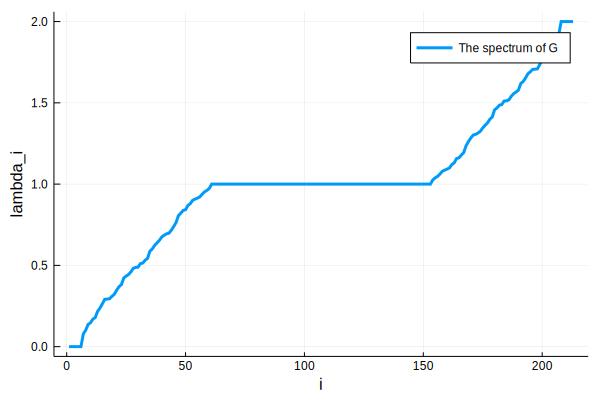

In [99]:
#computing and plotting the spectrum

E = eigen(L)
λ = E.values
P = plot(λ, label = "The spectrum of G",
             linewidth = 3,
             xlab = "i",
             ylab = "lambda_i")

In [100]:
revλ = sort(2 .-λ)

213-element Vector{Float64}:
 0.0
 2.220446049250313e-16
 2.220446049250313e-16
 2.220446049250313e-16
 4.440892098500626e-16
 4.440892098500626e-16
 0.07837813567772312
 0.10135394071837878
 0.13665532013583293
 0.1466427578590186
 0.16909253682634806
 0.17876449386461557
 0.21708225725241115
 ⋮
 1.821235506135385
 1.8309074631736522
 1.8533572421409816
 1.8633446798641669
 1.8986460592816217
 1.9216218643222776
 1.9999999999999925
 1.9999999999999936
 1.9999999999999993
 2.000000000000001
 2.000000000000001
 2.0000000000000036

In [101]:
#investigating symmetry of the spectrum around 1 (check Sheet 5!)
count(abs.(λ .- revλ) .< 10^(-14)), n

(213, 213)

In [102]:
#studying the biggest connected component H
C = connected_components(G)
k = findmax(length.(C))
I = C[k[2]]
H = Graph(A[I, I])

{196, 600} undirected simple Int64 graph

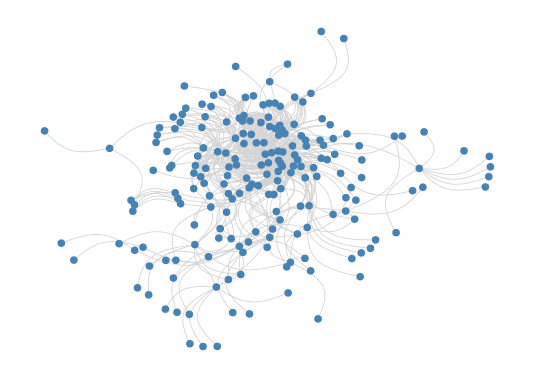

In [103]:
layout = spring_layout(G; C=5)
layout_H = (layout[1][I], layout[2][I])
P2 = gplot(H, layout_H...;
        linetype="curve", 
        nodelabeldist=2,
        nodefillc = colorant"steelblue"
)

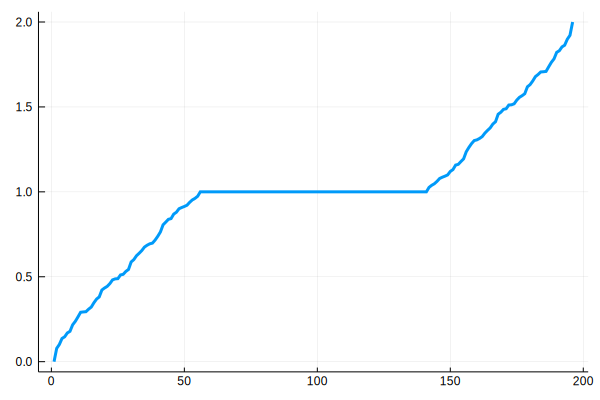

In [104]:
L_H = L[I,I]
E_H = eigen(L_H)
λ_H = E_H.values
plot(λ_H, legend = false, linewidth = 3)

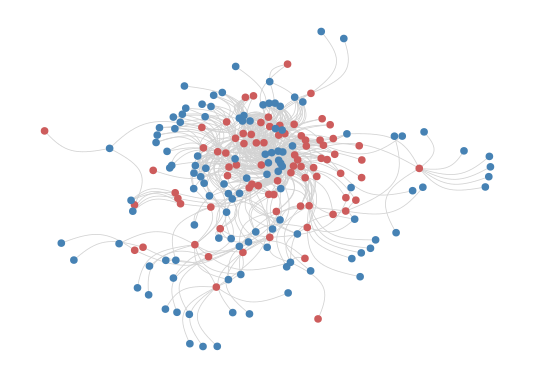

In [105]:
#finding the bipartition of H via the eigenvector associated with 2
u = E_H.vectors[:,end]
cols = []
for uᵢ in u
    if abs(uᵢ) > 1e-12 
        if uᵢ < 0
            push!(cols, colorant"steelblue")
        else
            push!(cols, colorant"indianred")
        end
    else
        push!(cols, colorant"orange")
    end
end
P3 = gplot(H, layout_H...;
        linetype="curve", 
        nodelabeldist=2,
        nodefillc = cols
)